<a href="https://colab.research.google.com/github/pufeiyang/Deep_Learning_Regression/blob/main/Tabnet_Regress_My_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 安装必要的库

In [ ]:
!pip install pytorch-tabnet
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ad01ac1c237ea2238303467cc4a4b43605b954975d44a2e1e2e45be5c61081bf
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# 导入必要的库

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
np.random.seed(0)

from matplotlib import pyplot as plt

import os
import wget
from pathlib import Path

# 载入数据和划分数据集

In [ ]:
data_path = '/Dataset.xlsx'
df = pd.read_excel(data_path)
df.head(5)

,mmse(m24),ZABETA_UPENNBIOMK9_04_19_17,ZTAU_UPENNBIOMK9_04_19_17,ZPTAU_UPENNBIOMK9_04_19_17,ZAGE,ZAPOE4,ZFDG,ZRAVLT_immediate,ZCDRSB,ZADAS11,...,Zrh_inferiortemporal_volume,Zrh_middletemporal_volume,Zrh_parahippocampal_volume,Zrh_posteriorcingulate_volume,Zrh_precuneus_volume,Zrh_rostralmiddlefrontal_volume,Zrh_superiorfrontal_volume,Zrh_superiorparietal_volume,Zrh_superiortemporal_volume,Zrh_supramarginal_volume
0,27,1.42393,0.06375,-0.12316,0.50334,-0.71701,0.47600,1.25495,-0.89064,-0.37825,...,-0.80558,-1.53492,-0.22033,-1.05270,-0.38616,-0.70159,-0.75244,-0.82934,-0.54609,-0.90841
1,30,0.03987,-0.61044,-0.66533,1.00535,-0.71701,-0.41630,-0.35592,-0.89064,-0.37825,...,1.06081,-0.82423,0.22365,0.25408,-0.45826,-0.20723,-0.08814,-1.26481,0.17315,-1.68200
2,28,0.64827,-0.54429,-0.48109,-0.23646,-0.71701,2.11095,0.27053,-0.89064,0.25604,...,-0.32981,-0.41592,-0.30792,0.02757,0.16070,-0.71896,-0.44941,0.91662,-0.68629,0.47743
3,29,-0.14347,0.01391,0.03186,-0.03830,0.98199,0.40925,0.89698,-0.89064,0.04461,...,0.57954,-0.04582,-0.40759,0.56965,0.34324,0.23658,1.26612,-0.72064,-0.10724,0.40958
4,30,-0.45258,-0.52526,-0.53871,-1.41222,-0.71701,1.56180,-1.07186,-0.48866,0.67890,...,-0.47413,-0.15913,0.67670,-0.41964,-0.75738,0.90625,0.06745,0.77191,-0.04005,0.01907


In [ ]:
features = df.iloc[:,1:].values
target = df.iloc[:,0].values
print('The shape of features:',features.shape)
print('The shape of target:',target.shape)

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=5)
print('\nThe shape of x_train:',x_train.shape)
print('The shape of x_test:',x_test.shape)
print('The shape of y_train:',y_train.shape)
print('The shape of y_test:',y_test.shape)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

The shape of features: (218, 135)
The shape of target: (218,)

The shape of x_train: (174, 135)
The shape of x_test: (44, 135)
The shape of y_train: (174,)
The shape of y_test: (44,)


# 模型训练

In [ ]:
model = TabNetRegressor()

Device used : cpu


In [ ]:
model.fit(
    X_train=x_train, y_train=y_train,
    eval_set=[(x_train, y_train), (x_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['rmsle', 'mae', 'rmse', 'mse'],
    max_epochs=100,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

epoch 0  | loss: 961.22107| train_rmsle: 11.11227| train_mae: 28.5688 | train_rmse: 28.81533| train_mse: 830.32351| valid_rmsle: 11.18089| valid_mae: 29.23393| valid_rmse: 29.49627| valid_mse: 870.02996|  0:00:00s
epoch 1  | loss: 931.53088| train_rmsle: 11.11227| train_mae: 28.17621| train_rmse: 28.42755| train_mse: 808.12574| valid_rmsle: 11.18089| valid_mae: 29.04788| valid_rmse: 29.30905| valid_mse: 859.02023|  0:00:00s
epoch 2  | loss: 906.84363| train_rmsle: 11.11227| train_mae: 27.95037| train_rmse: 28.20433| train_mse: 795.48442| valid_rmsle: 11.18089| valid_mae: 28.48022| valid_rmse: 28.74187| valid_mse: 826.09513|  0:00:00s
epoch 3  | loss: 877.48969| train_rmsle: 11.11227| train_mae: 27.78485| train_rmse: 28.03158| train_mse: 785.76922| valid_rmsle: 11.18089| valid_mae: 28.05668| valid_rmse: 28.23379| valid_mse: 797.14706|  0:00:00s
epoch 4  | loss: 858.07318| train_rmsle: 11.11227| train_mae: 27.65964| train_rmse: 27.90178| train_mse: 778.50909| valid_rmsle: 11.18089| valid

In [ ]:
preds = model.predict(x_test)

y_true = y_test

test_score = mean_squared_error(y_pred=preds, y_true=y_true)

print(f"BEST VALID SCORE FOR MY DATASET : {model.best_cost}")
print(f"FINAL TEST SCORE FOR MY DATASET : {test_score}")

BEST VALID SCORE FOR MY DATASET : 14.609885610348101
FINAL TEST SCORE FOR MY DATASET : 14.609885610348101


# 保存和加载模型

In [ ]:
# save tabnet model
saving_path_name = "./tabnet_model_regress"
saved_filepath = model.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_regress.zip


In [ ]:
# define new model with basic parameters and load state dict weights
loaded_model = TabNetRegressor()
loaded_model.load_model(saved_filepath)

Device used : cpu
Device used : cpu


In [ ]:
loaded_preds = loaded_model.predict(x_test)
loaded_test_mse = mean_squared_error(loaded_preds, y_test)

print(f"FINAL TEST SCORE FOR MY DATASET : {loaded_test_mse}")

FINAL TEST SCORE FOR MY DATASET : 14.609885610348101


In [ ]:
assert(test_score == loaded_test_mse)

# 特征重要性

In [ ]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 6.71387939e-04, 2.05337841e-02,
       4.78542542e-05, 2.17509603e-03, 0.00000000e+00, 1.41780750e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.34894672e-02, 5.75657313e-03,
       6.85875311e-04, 0.00000000e+00, 3.21929310e-03, 1.56464058e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.08791711e-04,
       0.00000000e+00, 3.40201875e-04, 3.01925679e-04, 9.19540613e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.81645360e-03,
       7.94479938e-04, 1.89988521e-03, 9.56426588e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.53322704e-03, 0.00000000e+00, 0.00000000e+00, 1.45608244e-02,
       0.00000000e+00, 1.07059504e-02, 0.00000000e+00, 1.30042589e-03,
       6.59163652e-03, 7.98508567e-03, 0.00000000e+00, 0.00000000e+00,
      

# 可解释性

In [ ]:
explain_matrix, masks = model.explain(x_test)

In [ ]:
%matplotlib inline

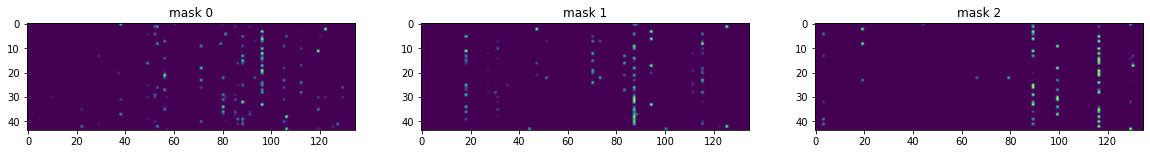

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

# XGB

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=8,
    learning_rate=0.1,
    n_estimators=1000,
    verbosity=0,
    silent=None,
    objective='reg:linear',
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)

xgb.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=40,
        verbose=10)

[0]	validation_0-rmse:24.5511
Will train until validation_0-rmse hasn't improved in 40 rounds.
[10]	validation_0-rmse:9.42919
[20]	validation_0-rmse:4.72822
[30]	validation_0-rmse:3.23197
[40]	validation_0-rmse:2.84529
[50]	validation_0-rmse:2.7188
[60]	validation_0-rmse:2.65901
[70]	validation_0-rmse:2.65138
[80]	validation_0-rmse:2.64361
[90]	validation_0-rmse:2.6449
[100]	validation_0-rmse:2.64117
[110]	validation_0-rmse:2.64071
[120]	validation_0-rmse:2.64072
[130]	validation_0-rmse:2.64025
[140]	validation_0-rmse:2.64001
[150]	validation_0-rmse:2.6397
[160]	validation_0-rmse:2.63978
[170]	validation_0-rmse:2.63987
Stopping. Best iteration:
[135]	validation_0-rmse:2.63949



XGBRegressor(max_depth=8, n_estimators=1000, n_jobs=-1, subsample=0.7,
             verbosity=0)

In [ ]:
preds = np.array(xgb.predict(x_train))
valid_auc = mean_squared_error(y_pred=preds, y_true=y_train)
print('train_auc:', valid_auc)

preds = np.array(xgb.predict(x_test))
test_auc = mean_squared_error(y_pred=preds, y_true=y_test)
print('test_auc:', test_auc)

train_auc: 0.0004030733781950528
test_auc: 6.966890639384556
